**PROYECTO**: ANALISIS DE CORRELACIÓN ENTRE MERIDA Y TABASCO, ESTUDIANDO VARIABLES ECONOMICAS, POBLACIONALES Y DE EDUCACIÓN CON EL FIN DE ENTENDER POR QUE HAY MÁS DIVISION SOCIOECONOMICA EN UN ESTADO QUE EN OTRO, DANDOLE UN EFOQUE FINAL EN LA EDUCACION SUPERIOR.

**METODO DE TRABAJPO:** CRISP-DM

**TIPO DE AANLISIS:** EXPLORATORIO

**MODELO DE ENTRENAMIENTO:** RANDOM FOREST, CORRELACION ESTADISTICA.

**VISUALIZACIÓN DE DATOS:** MAPAS DE CALOR, GRAFICOS DE BARRAS AGRUPADAS E HISTOGRAMAS.

# BUSINESS UNDERSTANDING


MI OBJETIVO ES OBTENER UNA PATRON DE RESPUESTA COMO CONCLUSIONDE POR QUE MERIDA TIENE UNA DIVISION SOCCIOECNOMICA Y DE ESTATUS TAN FUERTE, HACIENDO UNA CORRELACION DE VARIABLES COMO EDUCACION, ECNOMIA, POBLACION Y MIGRACION ENTRE MERIDA Y TABASCO, PARA FINALMENTE DARLE UN ENFOQUE EN COMO AFECTA ESTO A LA EDUCACIÓN SUPERIOR, RESOLVIENDO ASI DOS VARIANTES (LA DIVISION SOCIOECNOMICA Y DÓNDE ES UN MEJOR LUGAR PARA ESTUDIAR DEACUERDO A LAS FORTALEZAS DE CADA ENTIDAD)

# DATA UNDERSTANDING

MIS DATOS FUERON OBTENIDOS DE DIVERSOS ARTICULOS Y PAGINAS OFICIALES DEL INEGI, Y FUERON DISTRIBUIDOS EN LOS SIGUIENTES DATA SETS:
>1. ECONOMICO: CON VARIABLES COMO LA PARTICIPACION Y AVANCE EN EL PIB, SUS ACTIVIDADES ECONOMICAS MAS FUERTES, NUMERO DE TRABAJDORES TOTALES, ETC.
>2. POBLACION, TURISMO E INMIGRACION: CON VARIABLES COMO LA POBLACION TOTAL, CANTIDAD DE POBLACION RURAL Y URBANA, VIVIENDAS, CANTIDAD DE TURISMO, TIPO DE TURISMO, PROCEDENCIA DE INMIGRANTES, ETC.
>3. EDUCACION SUPERIOS: DATOS DE LAS UNIVERSIDADES CATALOGADAS COMO LAS MEJROES EN CADA ENTIDAD, CON SU RESPECTIVO RUBRO, COSTO DE COLEGITURA ANUAL, UBICACION, ETC.

*A CONTINUACION DARÉ A CONOCER EL DICCIONARIO DE TODAS LAS VARIABLES QUE SE ENCONTRRAN EN LOS DATA SETS :)*

In [1]:
import pandas as pd
Dicc = pd.read_csv('/content/DICCIONARIO.csv')
Dicc

,VARIABLE,CLAVE
0,ACTIVIDADES PRIMARIAAS (PIB),ACTPRI
1,ACTIVIDADES SECUNDRIAS (PIB),ACTSEC
2,ACTIVIDADES TERCIARIAS (PIB),ACTTER
3,PARTICIPACION DEL PIB %,PARPIB
4,AVANCE EN DEL 2003-2014,AVA
...,...,...
63,PORCENTAJE DE HOGARES NUCLEARES,HOGNUC
64,PORCENTAJE DE HOGARES AMPLEADOS,HOGAMP
65,PORCENTAJE DE HOGARES COMPUESTOS,HOGCOM
66,PORCENTAJE DE HOGARE UNIPERSONALES,UNIPER


# DATA PREPROCESING

LIMPIEZA DE DATOS CON EL PRIMER DATA SET SOBRE LAS UNIVERSIDADES

In [2]:
import pandas as pd
Edu = pd.read_csv('/content/EDUCACION.csv')
Edu

,ENTIDAD,INST,TIPO,MUN,LOC,CP,COSTAN,RUBINST
0,TABASCO,Universidad Juárez Autónoma de Tabasco,PUBLICA,VILLAHERMOSA,COLONIA,86040,4000,CIENCIAS Y HUMANIDADES
1,TABASCO,Instituto Tecnológico de Villahermosa,PUBLICA,VILLAHERMOSA,COLONIA,86010,7324,CIENCIAS Y COMPUTACION
2,TABASCO,Universidad Olmeca A.C.,PRIVADA,VILLAHERMOSA,COLONIA,86280,12532,LICENCIATURA
3,TABASCO,Universidad Tecnológica de Tabasco,PRIVADA,VILLAHERMOSA,CARRETERA,86000,11820,GATRONOMIA Y PETROLEO
4,TABASCO,Universidad Politécnica del Centro,PUBLICA,VILLAHERMOSA,RANCHERIA,86290,7000,CIENCIAS Y MANUFACTURA
5,TABASCO,Universidad de Sotavento A.C.,PRIVADA,VILLAHERMOSA,COLONIA,86029,66400,ADMINISTRATIVO
6,TABASCO,Universidad Mundo Maya,PRIVADA,VILLAHERMOSA,CARRETERA,86126,30000,CIENCIAS Y HUMANIDADES
7,TABASCO,Instituto Tecnológico de la Chontalpa,PUBLICA,NACAJUCA,EJIDO,86220,8000,GEOCIENCIAS Y PEROLEO
8,TABASCO,Instituto Tecnológico de Huimanguillo,PUBLICA,HUIMANGUILLO,CARRETERA,86270,8000,PETROLEO
9,TABASCO,Universidad Popular de la Chontalpa,PRIVADA,CARDENAS,RANCHERIA,86500,46680,PETROLEO Y MANUFACUTRA


In [3]:
#DATOS NULOS
def contar_asteriscos(celda):
    return str(celda).count('*') if isinstance(celda, str) else 0
cantidad_asteriscos_por_columna = Edu.applymap(contar_asteriscos)
total_asteriscos = cantidad_asteriscos_por_columna.sum().sum()

print(f'Total de nulos: {total_asteriscos}')

Total de nulos: 1


In [4]:
#ELIMINANDO DATOS NULOS
def borrar_nulo(fila):
    return any('*' in str(valor) for valor in fila)

# Aplicar la función a cada fila y obtener un booleano indicando si contiene asteriscos
filasConNulo = Edu.apply(borrar_nulo, axis=1)
# Eliminar las filas que contienen asteriscos
Edu_limpio = Edu[~filasConNulo]
# Mostrar información sobre el DataFrame resultante
print(f'Tamaño del DataFrame original: {Edu.shape}')
print(f'Tamaño del DataFrame después de eliminar filas con asteriscos: {Edu_limpio.shape}')


Tamaño del DataFrame original: (20, 8)
Tamaño del DataFrame después de eliminar filas con asteriscos: (19, 8)


In [5]:
print(Edu.dtypes)

ENTIDAD    object
INST       object
TIPO       object
MUN        object
LOC        object
CP          int64
COSTAN     object
RUBINST    object
dtype: object


In [6]:
#CONVERSION DE DATOS
from sklearn.preprocessing import LabelEncoder
Edu = pd.get_dummies(Edu, columns=['TIPO'])
Edu['COSTAN'] = pd.to_numeric(Edu['COSTAN'].str.replace(',', ''), errors='coerce')

#YA QUE EL MUNICIPIO Y EL TIPO DE LOCALIDAD Y DE RUBRO INSTITUCIONAL SON FACOTRES QUE SE REPITEN Y QUE POSTERIORMENTE EVALUARE PARA MAPAS, SE CONVERTIRANA NUMERO
def custom_label_encoder(column):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(column) + 1
    return labels

columns_to_encode = ['ENTIDAD', 'LOC', 'INST', 'RUBINST']

for column in columns_to_encode:
    Edu[column + '_CODE'] = custom_label_encoder(Edu[column])

In [7]:
def custom_entity_label_encoder(df, entity_column, target_column):
    label_encoder = LabelEncoder()
    df[target_column + '_CODE'] = df.groupby(entity_column)[target_column].transform(lambda x: label_encoder.fit_transform(x) + 1)

# Aplicar el LabelEncoder para 'MUN' en cada entidad a partir de 1
custom_entity_label_encoder(Edu, 'ENTIDAD', 'MUN')

In [8]:
Edu

,ENTIDAD,INST,MUN,LOC,CP,COSTAN,RUBINST,TIPO_PRIVADA,TIPO_PUBLICA,ENTIDAD_CODE,LOC_CODE,INST_CODE,RUBINST_CODE,MUN_CODE
0,TABASCO,Universidad Juárez Autónoma de Tabasco,VILLAHERMOSA,COLONIA,86040,4000.0,CIENCIAS Y HUMANIDADES,0,1,1,2,9,4,6
1,TABASCO,Instituto Tecnológico de Villahermosa,VILLAHERMOSA,COLONIA,86010,7324.0,CIENCIAS Y COMPUTACION,0,1,1,2,5,3,6
2,TABASCO,Universidad Olmeca A.C.,VILLAHERMOSA,COLONIA,86280,12532.0,LICENCIATURA,1,0,1,2,13,11,6
3,TABASCO,Universidad Tecnológica de Tabasco,VILLAHERMOSA,CARRETERA,86000,11820.0,GATRONOMIA Y PETROLEO,1,0,1,1,18,9,6
4,TABASCO,Universidad Politécnica del Centro,VILLAHERMOSA,RANCHERIA,86290,7000.0,CIENCIAS Y MANUFACTURA,0,1,1,4,15,5,6
5,TABASCO,Universidad de Sotavento A.C.,VILLAHERMOSA,COLONIA,86029,66400.0,ADMINISTRATIVO,1,0,1,2,20,1,6
6,TABASCO,Universidad Mundo Maya,VILLAHERMOSA,CARRETERA,86126,30000.0,CIENCIAS Y HUMANIDADES,1,0,1,1,1,4,6
7,TABASCO,Instituto Tecnológico de la Chontalpa,NACAJUCA,EJIDO,86220,8000.0,GEOCIENCIAS Y PEROLEO,0,1,1,3,6,10,3
8,TABASCO,Instituto Tecnológico de Huimanguillo,HUIMANGUILLO,CARRETERA,86270,8000.0,PETROLEO,0,1,1,1,3,13,2
9,TABASCO,Universidad Popular de la Chontalpa,CARDENAS,RANCHERIA,86500,46680.0,PETROLEO Y MANUFACUTRA,1,0,1,4,17,14,1


In [9]:
Edu = Edu.drop(['MUN', 'LOC', 'RUBINST', 'ENTIDAD', 'INST'], axis=1)
print(Edu.head())

      CP   COSTAN  TIPO_PRIVADA  TIPO_PUBLICA  ENTIDAD_CODE  LOC_CODE  \
0  86040   4000.0             0             1             1         2   
1  86010   7324.0             0             1             1         2   
2  86280  12532.0             1             0             1         2   
3  86000  11820.0             1             0             1         1   
4  86290   7000.0             0             1             1         4   

   INST_CODE  RUBINST_CODE  MUN_CODE  
0          9             4         6  
1          5             3         6  
2         13            11         6  
3         18             9         6  
4         15             5         6  


In [10]:
Edu = Edu.rename(columns={'RUBINST_CODE': 'RUBRO', 'MUN_CODE': 'MUNICIPIO', 'LOC_CODE': 'TIPO_DE_LOCALIDAD','ENTIDAD_CODE':'ENT', 'INST_CODE':'INSTI' })

In [11]:
#YA QUE MI OBJETIVO ES CONOCER QUE RUBRO ES MAS ESTUDIADO EN CADA ESTADO, LO PONDRÉ COMO COLUMNA PRICNIPAL:)
ReordenarEdu = ['RUBRO', 'ENT', 'INSTI', 'CP', 'COSTAN', 'TIPO_PRIVADA', 'TIPO_PUBLICA', 'MUNICIPIO', 'TIPO_DE_LOCALIDAD']
Edu = Edu[ReordenarEdu]
print(Edu.head(3))

   RUBRO  ENT  INSTI     CP   COSTAN  TIPO_PRIVADA  TIPO_PUBLICA  MUNICIPIO  \
0      4    1      9  86040   4000.0             0             1          6   
1      3    1      5  86010   7324.0             0             1          6   
2     11    1     13  86280  12532.0             1             0          6   

   TIPO_DE_LOCALIDAD  
0                  2  
1                  2  
2                  2  


In [12]:
#NORMALIZACION
from sklearn.preprocessing import MinMaxScaler
scaler_costan = MinMaxScaler()

# Aplicar la normalización a 'COSTAN' con rango especifico del 1 al 2 para no tener problemas con el modelo
def custom_normalization(column):
    min_val = column.min()
    max_val = column.max()
    range_min = 1
    range_max = 2
    return range_min + ((column - min_val) / (max_val - min_val)) * (range_max - range_min)

Edu['COSTAN_normalized'] = custom_normalization(Edu['COSTAN'])

# Normalizar 'CP' por entidad, ya que el codigo postal vria segun la entidad y si los normalio de forma general se perderá la agrpacion
def custom_grouped_normalization(column):
    min_vals = column.groupby(Edu['ENT']).transform('min')
    max_vals = column.groupby(Edu['ENT']).transform('max')
    range_min = 1
    range_max = 2
    return range_min + ((column - min_vals) / (max_vals - min_vals)) * (range_max - range_min)

Edu['CP_normalized'] = custom_grouped_normalization(Edu['CP'])

print(Edu.head(15))

    RUBRO  ENT  INSTI     CP   COSTAN  TIPO_PRIVADA  TIPO_PUBLICA  MUNICIPIO  \
0       4    1      9  86040   4000.0             0             1          6   
1       3    1      5  86010   7324.0             0             1          6   
2      11    1     13  86280  12532.0             1             0          6   
3       9    1     18  86000  11820.0             1             0          6   
4       5    1     15  86290   7000.0             0             1          6   
5       1    1     20  86029  66400.0             1             0          6   
6       4    1      1  86126  30000.0             1             0          6   
7      10    1      6  86220   8000.0             0             1          3   
8      13    1      3  86270   8000.0             0             1          2   
9      14    1     17  86500  46680.0             1             0          1   
10      2    1     16  86600  24213.0             1             0          4   
11      2    1      2  86290   5000.0   

In [13]:
Edu = Edu.drop(['CP', 'COSTAN'], axis=1)
print(Edu.head())

   RUBRO  ENT  INSTI  TIPO_PRIVADA  TIPO_PUBLICA  MUNICIPIO  \
0      4    1      9             0             1          6   
1      3    1      5             0             1          6   
2     11    1     13             1             0          6   
3      9    1     18             1             0          6   
4      5    1     15             0             1          6   

   TIPO_DE_LOCALIDAD  COSTAN_normalized  CP_normalized  
0                  2           1.000000       1.066667  
1                  2           1.018886       1.016667  
2                  2           1.048477       1.466667  
3                  1           1.044432       1.000000  
4                  4           1.017045       1.483333  


In [23]:
Edu = Edu.drop(15, axis=0)
# Reindexar el DataFrame después de eliminar la fila
Edu = Edu.reset_index(drop=True)

SEGUNDO DATA SET SOBRE LA INF ECONOMICA

In [35]:
Eco = pd.read_csv('/content/INFORMACIONECONOMICA.csv')
Eco

,ENTIDAD,ACTPRI,ACTSEC,ACTTER,PARPIB,AVA,PIBCRE,COM,INDMAN,SERVINM,EDU,TRANS,ACTGOB,AGROFOR,MIN,OTROS,SECPRIN,TRABTOT
0,TABASCO,2.0,54.2,43.8,3.14,0.42,3.88,5.5,4.6,6.9,2.9,3.1,2.5,2.2,56,19.9,MINERIA PETROLERA,308616
1,MERIDA,3.8,28.9,67.3,1.52,0.09,3.15,16.4,17.2,12.3,5.0,4.3,4.2,3.8,0,19.9,COMERCIO,516924


In [36]:
#DATOS NULOS
def contar_asteriscos(celda):
    return str(celda).count('*') if isinstance(celda, str) else 0
cantidad_asteriscos_por_columna = Eco.applymap(contar_asteriscos)
total_asteriscos = cantidad_asteriscos_por_columna.sum().sum()

print(f'Total de nulos: {total_asteriscos}')

Total de nulos: 0


In [37]:
print(Eco.dtypes)

ENTIDAD     object
ACTPRI     float64
ACTSEC     float64
ACTTER     float64
PARPIB     float64
AVA        float64
PIBCRE     float64
COM        float64
INDMAN     float64
SERVINM    float64
EDU        float64
TRANS      float64
ACTGOB     float64
AGROFOR    float64
MIN          int64
OTROS      float64
SECPRIN     object
TRABTOT      int64
dtype: object


In [45]:
#CONVERSION DE DATOS
from sklearn.preprocessing import LabelEncoder
Eco['TRABTOT'] = Eco['TRABTOT'].astype(float)
Eco['MIN'] = Eco['MIN'].astype(float)

label_encoder_enntidos = LabelEncoder()
Eco['ENT'] = label_encoder_enntidos.fit_transform(Eco['ENTIDAD']) + 1
label_encoder_secprin = LabelEncoder()
Eco['INGRESO'] = label_encoder_secprin.fit_transform(Eco['SECPRIN']) + 1

In [47]:
Eco['ENT'] = Eco['ENT'].astype(float)
Eco['INGRESO'] = Eco['INGRESO'].astype(float)

print(Eco.dtypes)
print(Eco.head(2))

ENTIDAD     object
ACTPRI     float64
ACTSEC     float64
ACTTER     float64
PARPIB     float64
AVA        float64
PIBCRE     float64
COM        float64
INDMAN     float64
SERVINM    float64
EDU        float64
TRANS      float64
ACTGOB     float64
AGROFOR    float64
MIN        float64
OTROS      float64
SECPRIN     object
TRABTOT    float64
ENT        float64
INGRESO    float64
dtype: object
   ENTIDAD  ACTPRI  ACTSEC  ACTTER  PARPIB   AVA  PIBCRE   COM  INDMAN  \
0  TABASCO     2.0    54.2    43.8    3.14  0.42    3.88   5.5     4.6   
1   MERIDA     3.8    28.9    67.3    1.52  0.09    3.15  16.4    17.2   

   SERVINM  EDU  TRANS  ACTGOB  AGROFOR   MIN  OTROS            SECPRIN  \
0      6.9  2.9    3.1     2.5      2.2  56.0   19.9  MINERIA PETROLERA   
1     12.3  5.0    4.3     4.2      3.8   0.0   19.9           COMERCIO   

    TRABTOT  ENT  INGRESO  
0  308616.0  2.0      2.0  
1  516924.0  1.0      1.0  


In [49]:
Eco = Eco.drop(['ENTIDAD', 'SECPRIN'], axis=1)
print(Eco.dtypes)

ACTPRI     float64
ACTSEC     float64
ACTTER     float64
PARPIB     float64
AVA        float64
PIBCRE     float64
COM        float64
INDMAN     float64
SERVINM    float64
EDU        float64
TRANS      float64
ACTGOB     float64
AGROFOR    float64
MIN        float64
OTROS      float64
TRABTOT    float64
ENT        float64
INGRESO    float64
dtype: object


In [50]:
print(Eco.columns)

Index(['ACTPRI', 'ACTSEC', 'ACTTER', 'PARPIB', 'AVA', 'PIBCRE', 'COM',
       'INDMAN', 'SERVINM', 'EDU', 'TRANS', 'ACTGOB', 'AGROFOR', 'MIN',
       'OTROS', 'TRABTOT', 'ENT', 'INGRESO'],
      dtype='object')


In [52]:
ReordenarEco = ['TRABTOT', 'ENT', 'ACTPRI', 'ACTSEC', 'ACTTER', 'PARPIB', 'AVA', 'PIBCRE', 'COM',
       'INDMAN', 'SERVINM', 'EDU', 'TRANS', 'ACTGOB', 'AGROFOR', 'MIN',
       'OTROS', 'INGRESO']
Eco = Eco[ReordenarEco]
print(Eco)

    TRABTOT  ENT  ACTPRI  ACTSEC  ACTTER  PARPIB   AVA  PIBCRE   COM  INDMAN  \
0  308616.0  2.0     2.0    54.2    43.8    3.14  0.42    3.88   5.5     4.6   
1  516924.0  1.0     3.8    28.9    67.3    1.52  0.09    3.15  16.4    17.2   

   SERVINM  EDU  TRANS  ACTGOB  AGROFOR   MIN  OTROS  INGRESO  
0      6.9  2.9    3.1     2.5      2.2  56.0   19.9      2.0  
1     12.3  5.0    4.3     4.2      3.8   0.0   19.9      1.0  


PREPROCESAMIENTO DEL TERCER DATA SET QUE CONTIENE DATOS SOBRE LA POBLACIÓN

In [53]:
Pob = pd.read_csv('/content/POBLACION_TURISMO_MIGRACION.csv')
Pob

,ENTIDAD,TURTOT,TURNAC,TUREXT,TIPTUR,ZONATUR,INMTOT,INMNAC,INMINT,INMCHI,...,CUADOR,CINDOR,AGUPOT,ENEREL,DRENPUB,HOGNUC,HOGAMP,HOGCOM,UNIPER,CORRES
0,TABASCO,32000,92,8,6,13,37285,23.1,76.9,18,...,2.3,0.4,66.9,93.3,49.7,63.3,24.0,0.8,11.4,0.4
1,MERIDA,35551,79,21,5,12,100209,42.0,58.0,*,...,2.2,0.4,78.1,98.9,13.0,61.6,23.9,1.2,12.5,0.7


In [54]:
#DATOS NULOS
def contar_asteriscos(celda):
    return str(celda).count('*') if isinstance(celda, str) else 0
cantidad_asteriscos_por_columna = Pob.applymap(contar_asteriscos)
total_asteriscos = cantidad_asteriscos_por_columna.sum().sum()

print(f'Total de nulos: {total_asteriscos}')

Total de nulos: 2


In [56]:
#RELLENANDO NULOS
def convertir_asteriscos(celda):
    return 0 if isinstance(celda, str) and '*' in celda else celda
Pob = Pob.applymap(convertir_asteriscos)

In [60]:
Pob.dtypes

ENTIDAD      object
TURTOT        int64
TURNAC        int64
TUREXT        int64
TIPTUR        int64
ZONATUR       int64
INMTOT        int64
INMNAC      float64
INMINT      float64
INMCHI       object
INMTAB        int64
INMVER        int64
INMCAM        int64
INMQRO        int64
INMCDM        int64
INMEUA        int64
INMCAN       object
INMHON        int64
INMGUA      float64
INMCUB      float64
INMVEN      float64
POBTOT        int64
HABLEIND      int64
TERR        float64
MUN           int64
LOCURB        int64
LOCRUR        int64
POBUR         int64
POBRUR        int64
PROED       float64
PORANA      float64
RECAT       float64
REPRO         int64
SINRE       float64
VIVIPAR       int64
UNDOR       float64
DOSDOR      float64
TRESDOR     float64
CUADOR      float64
CINDOR      float64
AGUPOT      float64
ENEREL      float64
DRENPUB     float64
HOGNUC      float64
HOGAMP      float64
HOGCOM      float64
UNIPER      float64
CORRES      float64
dtype: object

In [61]:
def convertir_enteros_a_float(celda):
    try:
        return float(celda)
    except (ValueError, TypeError):
        return celda
Pob = Pob.applymap(convertir_enteros_a_float)

In [62]:
Pob.dtypes

ENTIDAD      object
TURTOT      float64
TURNAC      float64
TUREXT      float64
TIPTUR      float64
ZONATUR     float64
INMTOT      float64
INMNAC      float64
INMINT      float64
INMCHI      float64
INMTAB      float64
INMVER      float64
INMCAM      float64
INMQRO      float64
INMCDM      float64
INMEUA      float64
INMCAN      float64
INMHON      float64
INMGUA      float64
INMCUB      float64
INMVEN      float64
POBTOT      float64
HABLEIND    float64
TERR        float64
MUN         float64
LOCURB      float64
LOCRUR      float64
POBUR       float64
POBRUR      float64
PROED       float64
PORANA      float64
RECAT       float64
REPRO       float64
SINRE       float64
VIVIPAR     float64
UNDOR       float64
DOSDOR      float64
TRESDOR     float64
CUADOR      float64
CINDOR      float64
AGUPOT      float64
ENEREL      float64
DRENPUB     float64
HOGNUC      float64
HOGAMP      float64
HOGCOM      float64
UNIPER      float64
CORRES      float64
dtype: object

In [65]:
label_encoder_enntres = LabelEncoder()
Pob['ENT'] = label_encoder_enntres.fit_transform(Pob['ENTIDAD']) + 1
Pob['ENT'] = Pob['ENT'].astype(float)
Pob = Pob.drop(columns=['ENTIDAD'])

In [67]:
print(Pob.columns)

Index(['TURTOT', 'TURNAC', 'TUREXT', 'TIPTUR', 'ZONATUR', 'INMTOT', 'INMNAC',
       'INMINT', 'INMCHI', 'INMTAB', 'INMVER', 'INMCAM', 'INMQRO', 'INMCDM',
       'INMEUA', 'INMCAN', 'INMHON', 'INMGUA', 'INMCUB', 'INMVEN', 'POBTOT',
       'HABLEIND', 'TERR', 'MUN', 'LOCURB', 'LOCRUR', 'POBUR', 'POBRUR',
       'PROED', 'PORANA', 'RECAT', 'REPRO', 'SINRE', 'VIVIPAR', 'UNDOR',
       'DOSDOR', 'TRESDOR', 'CUADOR', 'CINDOR', 'AGUPOT', 'ENEREL', 'DRENPUB',
       'HOGNUC', 'HOGAMP', 'HOGCOM', 'UNIPER', 'CORRES', 'ENT'],
      dtype='object')


In [69]:
ReordenarPob = ['ENT', 'MUN', 'TERR', 'POBTOT','POBUR', 'POBRUR', 'TURTOT', 'INMTOT',
                'TURNAC', 'TUREXT', 'TIPTUR', 'ZONATUR', 'INMNAC','INMINT',
                'INMCHI', 'INMTAB', 'INMVER', 'INMCAM', 'INMQRO', 'INMCDM',
                'INMEUA', 'INMCAN', 'INMHON', 'INMGUA', 'INMCUB', 'INMVEN',
                'HABLEIND', 'LOCURB', 'LOCRUR', 'PROED', 'PORANA', 'RECAT',
                'REPRO', 'SINRE', 'VIVIPAR', 'UNDOR', 'DOSDOR', 'TRESDOR',
                'CUADOR', 'CINDOR', 'AGUPOT', 'ENEREL', 'DRENPUB',
                'HOGNUC', 'HOGAMP', 'HOGCOM', 'UNIPER', 'CORRES']
Pob = Pob[ReordenarPob]
print(Pob)

   ENT    MUN  TERR     POBTOT  POBUR  POBRUR   TURTOT    INMTOT  TURNAC  \
0  2.0   17.0   1.3  2402598.0   59.0    41.0  32000.0   37285.0    92.0   
1  1.0  106.0   2.0  2320898.0   86.0    14.0  35551.0  100209.0    79.0   

   TUREXT  ...  CUADOR  CINDOR  AGUPOT  ENEREL  DRENPUB  HOGNUC  HOGAMP  \
0     8.0  ...     2.3     0.4    66.9    93.3     49.7    63.3    24.0   
1    21.0  ...     2.2     0.4    78.1    98.9     13.0    61.6    23.9   

   HOGCOM  UNIPER  CORRES  
0     0.8    11.4     0.4  
1     1.2    12.5     0.7  

[2 rows x 48 columns]


In [71]:
Edu.describe()


,RUBRO,ENT,INSTI,TIPO_PRIVADA,TIPO_PUBLICA,MUNICIPIO,TIPO_DE_LOCALIDAD,COSTAN_normalized,CP_normalized
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,7.421053,1.368421,10.473684,0.526316,0.473684,3.421053,2.000000,1.164883,1.466862
std,4.513139,0.495595,6.076991,0.512989,0.512989,2.292882,1.054093,0.252210,0.350949
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,1.000000,5.500000,0.000000,0.000000,1.000000,1.000000,1.017966,1.138333
50%,7.000000,1.000000,10.000000,1.000000,0.000000,3.000000,2.000000,1.044432,1.466667
75%,11.500000,2.000000,15.500000,1.000000,1.000000,6.000000,2.000000,1.195114,1.836835
max,15.000000,2.000000,20.000000,1.000000,1.000000,6.000000,4.000000,2.000000,2.000000


In [72]:
Eco.describe()

,TRABTOT,ENT,ACTPRI,ACTSEC,ACTTER,PARPIB,AVA,PIBCRE,COM,INDMAN,SERVINM,EDU,TRANS,ACTGOB,AGROFOR,MIN,OTROS,INGRESO
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.0,2.000000
mean,412770.000000,1.500000,2.900000,41.550000,55.550000,2.330000,0.255000,3.515000,10.950000,10.900000,9.600000,3.950000,3.700000,3.350000,3.000000,28.00000,19.9,1.500000
std,147295.999375,0.707107,1.272792,17.889802,16.617009,1.145513,0.233345,0.516188,7.707464,8.909545,3.818377,1.484924,0.848528,1.202082,1.131371,39.59798,0.0,0.707107
min,308616.000000,1.000000,2.000000,28.900000,43.800000,1.520000,0.090000,3.150000,5.500000,4.600000,6.900000,2.900000,3.100000,2.500000,2.200000,0.00000,19.9,1.000000
25%,360693.000000,1.250000,2.450000,35.225000,49.675000,1.925000,0.172500,3.332500,8.225000,7.750000,8.250000,3.425000,3.400000,2.925000,2.600000,14.00000,19.9,1.250000
50%,412770.000000,1.500000,2.900000,41.550000,55.550000,2.330000,0.255000,3.515000,10.950000,10.900000,9.600000,3.950000,3.700000,3.350000,3.000000,28.00000,19.9,1.500000
75%,464847.000000,1.750000,3.350000,47.875000,61.425000,2.735000,0.337500,3.697500,13.675000,14.050000,10.950000,4.475000,4.000000,3.775000,3.400000,42.00000,19.9,1.750000
max,516924.000000,2.000000,3.800000,54.200000,67.300000,3.140000,0.420000,3.880000,16.400000,17.200000,12.300000,5.000000,4.300000,4.200000,3.800000,56.00000,19.9,2.000000


In [73]:
Pob.describe()

,ENT,MUN,TERR,POBTOT,POBUR,POBRUR,TURTOT,INMTOT,TURNAC,TUREXT,...,CUADOR,CINDOR,AGUPOT,ENEREL,DRENPUB,HOGNUC,HOGAMP,HOGCOM,UNIPER,CORRES
count,2.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,...,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.500000,61.500000,1.650000,2.361748e+06,72.500000,27.500000,33775.50000,68747.000000,85.500000,14.500000,...,2.250000,0.4,72.500000,96.100000,31.350000,62.450000,23.950000,1.000000,11.950000,0.550000
std,0.707107,62.932504,0.494975,5.777062e+04,19.091883,19.091883,2510.93618,44493.987099,9.192388,9.192388,...,0.070711,0.0,7.919596,3.959798,25.950819,1.202082,0.070711,0.282843,0.777817,0.212132
min,1.000000,17.000000,1.300000,2.320898e+06,59.000000,14.000000,32000.00000,37285.000000,79.000000,8.000000,...,2.200000,0.4,66.900000,93.300000,13.000000,61.600000,23.900000,0.800000,11.400000,0.400000
25%,1.250000,39.250000,1.475000,2.341323e+06,65.750000,20.750000,32887.75000,53016.000000,82.250000,11.250000,...,2.225000,0.4,69.700000,94.700000,22.175000,62.025000,23.925000,0.900000,11.675000,0.475000
50%,1.500000,61.500000,1.650000,2.361748e+06,72.500000,27.500000,33775.50000,68747.000000,85.500000,14.500000,...,2.250000,0.4,72.500000,96.100000,31.350000,62.450000,23.950000,1.000000,11.950000,0.550000
75%,1.750000,83.750000,1.825000,2.382173e+06,79.250000,34.250000,34663.25000,84478.000000,88.750000,17.750000,...,2.275000,0.4,75.300000,97.500000,40.525000,62.875000,23.975000,1.100000,12.225000,0.625000
max,2.000000,106.000000,2.000000,2.402598e+06,86.000000,41.000000,35551.00000,100209.000000,92.000000,21.000000,...,2.300000,0.4,78.100000,98.900000,49.700000,63.300000,24.000000,1.200000,12.500000,0.700000


# MODELING

In [31]:
#ENTRENAMIENTO DEL DATASET EDUCACION
#Debido a que deseo saber algunos pesos que tiene la eduacion en cada entidad oara despues
#utilizarlo como caracteristicas adicionales en mi data set de economia ya si poder hacer
#analisis completo de mi proyecto, entrenare este data set por seprado de los otros dos
#utilizando RandomForest ya que me puede rpedecir multiples variables y por la naturaleza de mis tipos de datos

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X = Edu[['CP_normalized', 'INSTI', 'TIPO_PRIVADA', 'TIPO_PUBLICA',
       'MUNICIPIO', 'TIPO_DE_LOCALIDAD', 'COSTAN_normalized', 'RUBRO']]
y = Edu['ENT']

In [32]:
print(X.columns)

Index(['CP_normalized', 'INSTI', 'TIPO_PRIVADA', 'TIPO_PUBLICA', 'MUNICIPIO',
       'TIPO_DE_LOCALIDAD', 'COSTAN_normalized', 'RUBRO'],
      dtype='object')


In [33]:
nan_columns = Edu.columns[Edu.isnull().any()]
nan_counts = Edu[nan_columns].isnull().sum()

# Imprimir las columnas que contienen NaN y la cantidad de NaN en cada una
print("Columnas con NaN y cantidad de NaN:")
print(nan_counts)

Columnas con NaN y cantidad de NaN:
Series([], dtype: float64)


In [34]:
from sklearn.impute import SimpleImputer
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo (por ejemplo, precisión)
precision = accuracy_score(y_test, predicciones)
print(f"Precisión: {precision}")

Precisión: 1.0


In [22]:
Edu

,RUBRO,ENT,INSTI,TIPO_PRIVADA,TIPO_PUBLICA,MUNICIPIO,TIPO_DE_LOCALIDAD,COSTAN_normalized,CP_normalized
0,4,1,9,0,1,6,2,1.000000,1.066667
1,3,1,5,0,1,6,2,1.018886,1.016667
2,11,1,13,1,0,6,2,1.048477,1.466667
3,9,1,18,1,0,6,1,1.044432,1.000000
4,5,1,15,0,1,6,4,1.017045,1.483333
5,1,1,20,1,0,6,2,1.354545,1.048333
6,4,1,1,1,0,6,1,1.147727,1.210000
7,10,1,6,0,1,3,3,1.022727,1.366667
8,13,1,3,0,1,2,1,1.022727,1.450000
9,14,1,17,1,0,1,4,1.242500,1.833333


In [75]:
datacomb = pd.merge(Eco, Pob, on='ENT')
datacomb

,TRABTOT,ENT,ACTPRI,ACTSEC,ACTTER,PARPIB,AVA,PIBCRE,COM,INDMAN,...,CUADOR,CINDOR,AGUPOT,ENEREL,DRENPUB,HOGNUC,HOGAMP,HOGCOM,UNIPER,CORRES
0,308616.0,2.0,2.0,54.2,43.8,3.14,0.42,3.88,5.5,4.6,...,2.3,0.4,66.9,93.3,49.7,63.3,24.0,0.8,11.4,0.4
1,516924.0,1.0,3.8,28.9,67.3,1.52,0.09,3.15,16.4,17.2,...,2.2,0.4,78.1,98.9,13.0,61.6,23.9,1.2,12.5,0.7


In [76]:
datacomb.columns

Index(['TRABTOT', 'ENT', 'ACTPRI', 'ACTSEC', 'ACTTER', 'PARPIB', 'AVA',
       'PIBCRE', 'COM', 'INDMAN', 'SERVINM', 'EDU', 'TRANS', 'ACTGOB',
       'AGROFOR', 'MIN', 'OTROS', 'INGRESO', 'MUN', 'TERR', 'POBTOT', 'POBUR',
       'POBRUR', 'TURTOT', 'INMTOT', 'TURNAC', 'TUREXT', 'TIPTUR', 'ZONATUR',
       'INMNAC', 'INMINT', 'INMCHI', 'INMTAB', 'INMVER', 'INMCAM', 'INMQRO',
       'INMCDM', 'INMEUA', 'INMCAN', 'INMHON', 'INMGUA', 'INMCUB', 'INMVEN',
       'HABLEIND', 'LOCURB', 'LOCRUR', 'PROED', 'PORANA', 'RECAT', 'REPRO',
       'SINRE', 'VIVIPAR', 'UNDOR', 'DOSDOR', 'TRESDOR', 'CUADOR', 'CINDOR',
       'AGUPOT', 'ENEREL', 'DRENPUB', 'HOGNUC', 'HOGAMP', 'HOGCOM', 'UNIPER',
       'CORRES'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X1 = datacomb[['TRABTOT', 'ENT', 'ACTPRI', 'ACTSEC', 'ACTTER', 'PARPIB', 'AVA',
       'PIBCRE', 'COM', 'INDMAN', 'SERVINM', 'EDU', 'TRANS', 'ACTGOB',
       'AGROFOR', 'MIN', 'OTROS', 'INGRESO', 'MUN', 'TERR', 'POBTOT', 'POBUR',
       'POBRUR', 'TURTOT', 'INMTOT', 'TURNAC', 'TUREXT', 'TIPTUR', 'ZONATUR',
       'INMNAC', 'INMINT', 'INMCHI', 'INMTAB', 'INMVER', 'INMCAM', 'INMQRO',
       'INMCDM', 'INMEUA', 'INMCAN', 'INMHON', 'INMGUA', 'INMCUB', 'INMVEN',
       'HABLEIND', 'LOCURB', 'LOCRUR', 'PROED', 'RECAT', 'REPRO',
       'SINRE', 'VIVIPAR', 'UNDOR', 'DOSDOR', 'TRESDOR', 'CUADOR', 'CINDOR',
       'AGUPOT', 'ENEREL', 'DRENPUB', 'HOGNUC', 'HOGAMP', 'HOGCOM', 'UNIPER',
       'CORRES']]
y1 = datacomb['PORANA']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.2, random_state=42)

modelo = RandomForestRegressor()
modelo.fit(X_train2, y_train2)


RandomForestRegressor()

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predicciones en el conjunto de prueba
y_pred2 = modelo.predict(X_test2)

# Métricas de evaluación
mse = mean_squared_error(y_test2, y_pred2)

print(f'Mean Squared Error: {mse:.4f}')



Mean Squared Error: 0.1600


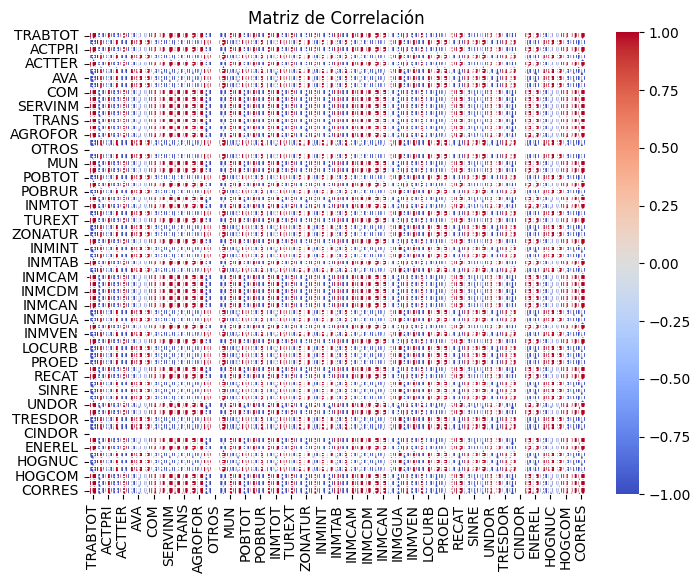

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = datacomb.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# ANALISIS DE CORRELACION Y VISUALIZACIONES

PERDONEME POR NO HACER GRAFICOS PADRES, YA NO ME DABA TIEMPO Y PARA LOS GRAFICOS PADRES NECESITABA DATA SETS BIDIMENCIONAL Y LOS MIOS NO ERÁN ASI:(

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
print(datacomb.columns)

Index(['TRABTOT', 'ENT', 'ACTPRI', 'ACTSEC', 'ACTTER', 'PARPIB', 'AVA',
       'PIBCRE', 'COM', 'INDMAN', 'SERVINM', 'EDU', 'TRANS', 'ACTGOB',
       'AGROFOR', 'MIN', 'OTROS', 'INGRESO', 'MUN', 'TERR', 'POBTOT', 'POBUR',
       'POBRUR', 'TURTOT', 'INMTOT', 'TURNAC', 'TUREXT', 'TIPTUR', 'ZONATUR',
       'INMNAC', 'INMINT', 'INMCHI', 'INMTAB', 'INMVER', 'INMCAM', 'INMQRO',
       'INMCDM', 'INMEUA', 'INMCAN', 'INMHON', 'INMGUA', 'INMCUB', 'INMVEN',
       'HABLEIND', 'LOCURB', 'LOCRUR', 'PROED', 'PORANA', 'RECAT', 'REPRO',
       'SINRE', 'VIVIPAR', 'UNDOR', 'DOSDOR', 'TRESDOR', 'CUADOR', 'CINDOR',
       'AGUPOT', 'ENEREL', 'DRENPUB', 'HOGNUC', 'HOGAMP', 'HOGCOM', 'UNIPER',
       'CORRES'],
      dtype='object')


In [90]:
print(datacomb)

    TRABTOT  ENT  ACTPRI  ACTSEC  ACTTER  PARPIB   AVA  PIBCRE   COM  INDMAN  \
0  308616.0  2.0     2.0    54.2    43.8    3.14  0.42    3.88   5.5     4.6   
1  516924.0  1.0     3.8    28.9    67.3    1.52  0.09    3.15  16.4    17.2   

   ...  CUADOR  CINDOR  AGUPOT  ENEREL  DRENPUB  HOGNUC  HOGAMP  HOGCOM  \
0  ...     2.3     0.4    66.9    93.3     49.7    63.3    24.0     0.8   
1  ...     2.2     0.4    78.1    98.9     13.0    61.6    23.9     1.2   

   UNIPER  CORRES  
0    11.4     0.4  
1    12.5     0.7  

[2 rows x 65 columns]


In [92]:
print(Edu.columns)
print(Edu)

Index(['RUBRO', 'ENT', 'INSTI', 'TIPO_PRIVADA', 'TIPO_PUBLICA', 'MUNICIPIO',
       'TIPO_DE_LOCALIDAD', 'COSTAN_normalized', 'CP_normalized'],
      dtype='object')
    RUBRO  ENT  INSTI  TIPO_PRIVADA  TIPO_PUBLICA  MUNICIPIO  \
0       4    1      9             0             1          6   
1       3    1      5             0             1          6   
2      11    1     13             1             0          6   
3       9    1     18             1             0          6   
4       5    1     15             0             1          6   
5       1    1     20             1             0          6   
6       4    1      1             1             0          6   
7      10    1      6             0             1          3   
8      13    1      3             0             1          2   
9      14    1     17             1             0          1   
10      2    1     16             1             0          4   
11      2    1      2             0             1          5   
12

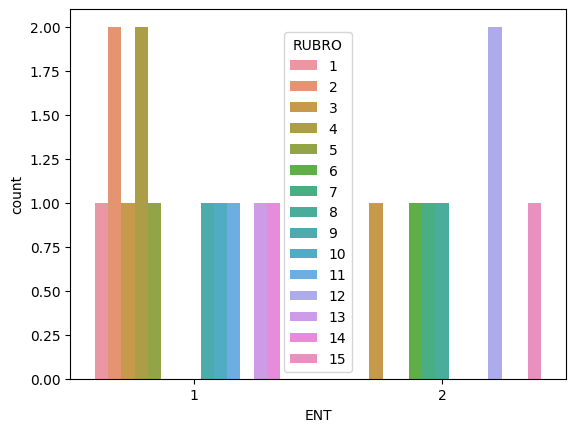

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame
sns.countplot(x='ENT', hue='RUBRO', data=Edu)
plt.show()

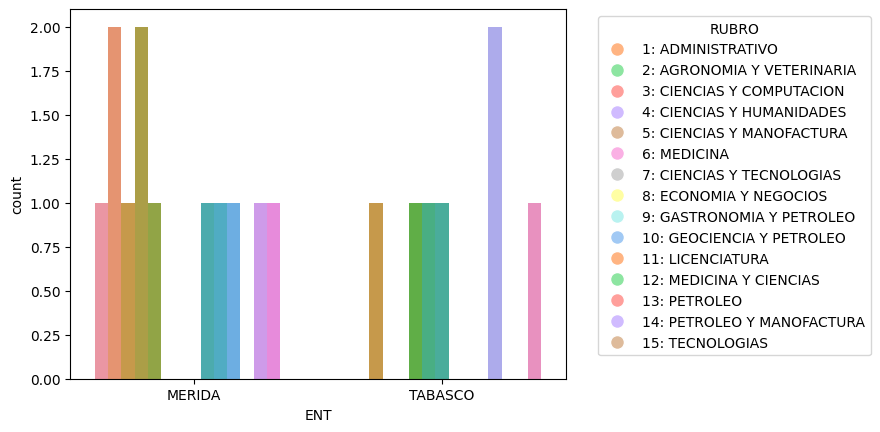

In [130]:

# Mapeo de códigos a nombres de rubros
rubro_mapping = {
    1: 'ADMINISTRATIVO',
    2: 'AGRONOMIA Y VETERINARIA',
    3: 'CIENCIAS Y COMPUTACION',
    4: 'CIENCIAS Y HUMANIDADES',
    5: 'CIENCIAS Y MANOFACTURA',
    6: 'MEDICINA',
    7: 'CIENCIAS Y TECNOLOGIAS',
    8: 'ECONOMIA Y NEGOCIOS',
    9: 'GASTRONOMIA Y PETROLEO',
    10: 'GEOCIENCIA Y PETROLEO',
    11: 'LICENCIATURA',
    12: 'MEDICINA Y CIENCIAS',
    13: 'PETROLEO',
    14: 'PETROLEO Y MANOFACTURA',
    15: 'TECNOLOGIAS',
}
ent_mapping = {
    1.0: 'MERIDA',
    2.0: 'TABASCO',
}

# Crear una nueva columna 'ENTIDAD' basada en el mapeo
Edu['ENT'] = Edu['ENT'].map(ent_mapping)
# Crear un gráfico de barras con Seaborn
sns.countplot(x='ENT', hue='RUBRO', data=Edu)

# Crear y agregar la leyenda con los nombres de los rubros
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {name}',
                      markerfacecolor=sns.color_palette('pastel')[code % len(sns.color_palette('pastel'))], markersize=10)
           for code, name in rubro_mapping.items()]
plt.legend(handles=handles, title='RUBRO', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



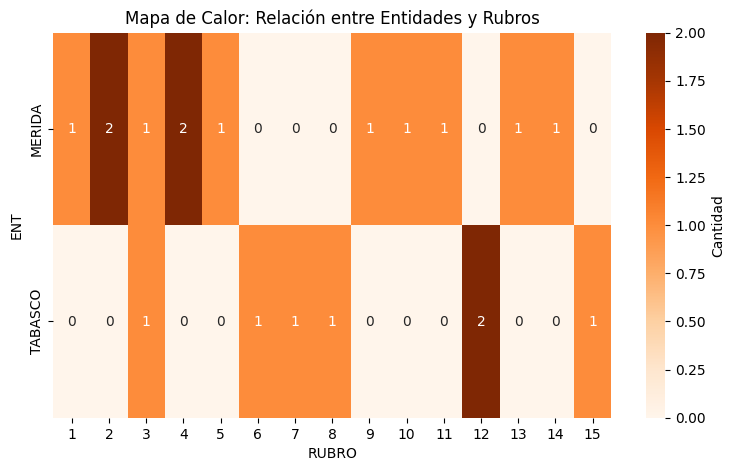

In [141]:

pivot_table = Edu.pivot_table(index='ENT', columns='RUBRO', aggfunc='size', fill_value=0)

# Crear un mapa de calor
plt.figure(figsize=(9, 5))
sns.heatmap(pivot_table, cmap='Oranges', annot=True, fmt='d', cbar_kws={'label': 'Cantidad'})
plt.title('Mapa de Calor: Relación entre Entidades y Rubros')
plt.show()


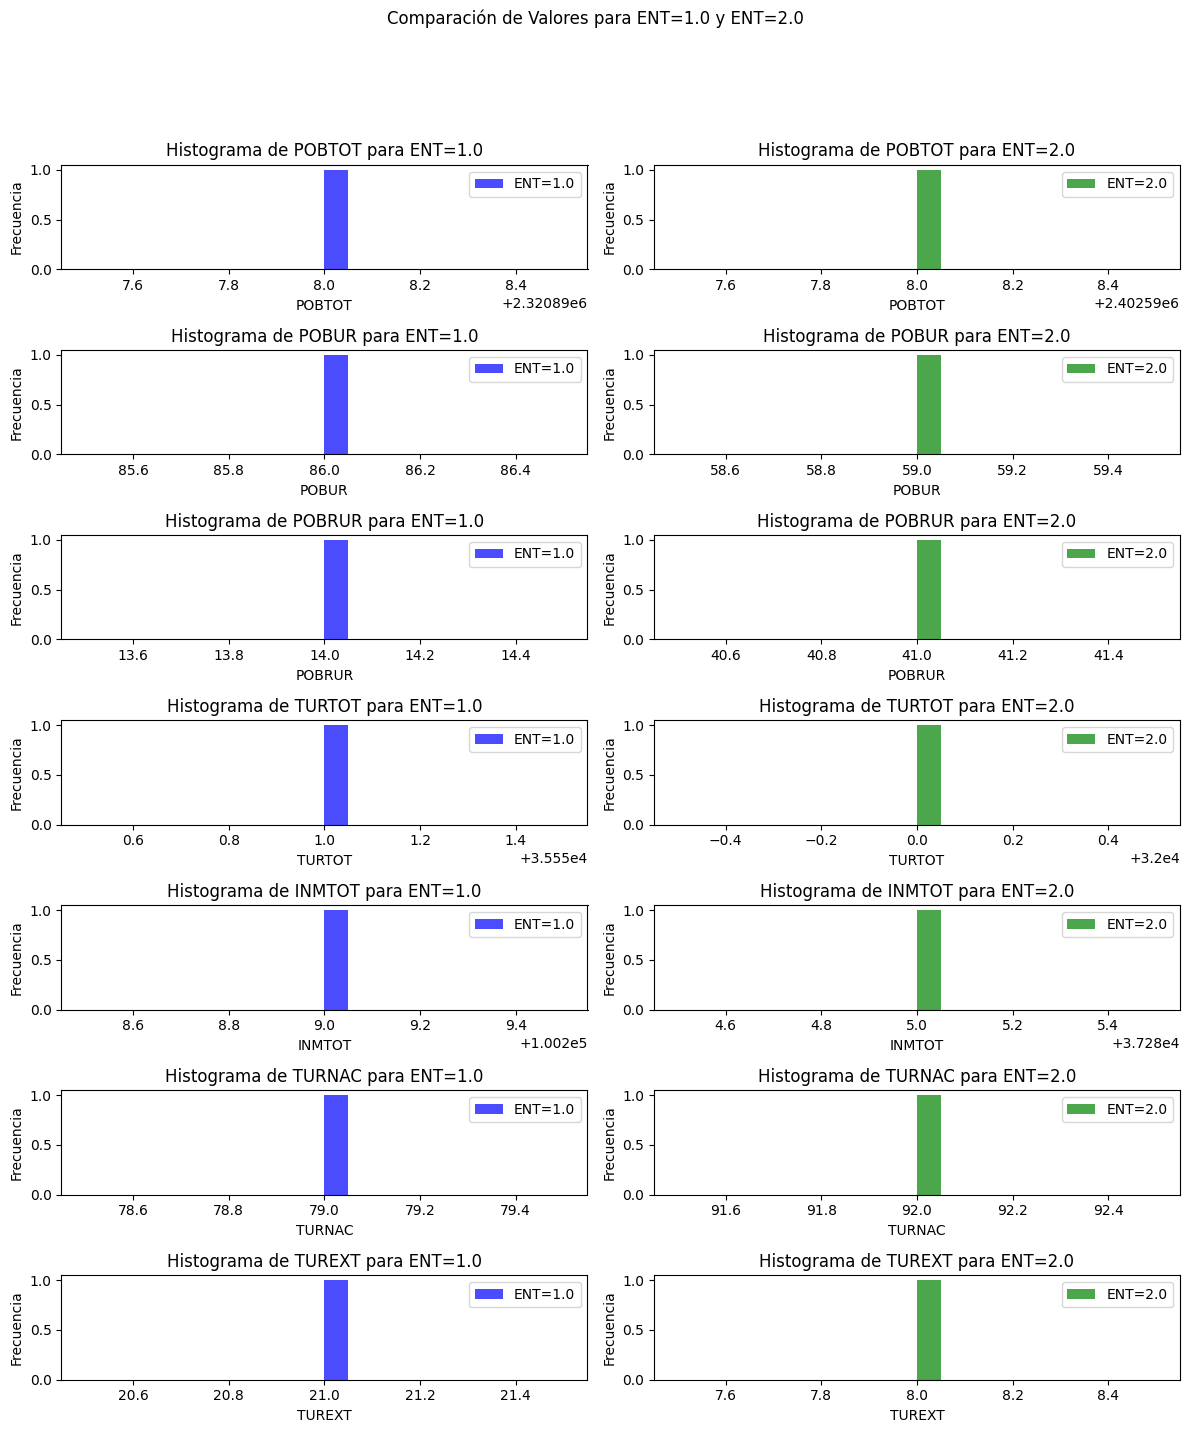

In [144]:

import matplotlib.colors as mcolors
ent_values_1 = datacomb[datacomb['ENT'] == 1.0]
ent_values_2 = datacomb[datacomb['ENT'] == 2.0]

# Lista de columnas a incluir en la tabla de gráficos
columnas = ['POBTOT', 'POBUR', 'POBRUR', 'TURTOT', 'INMTOT', 'TURNAC', 'TUREXT']

blue = mcolors.to_rgba('blue', alpha=0.9)
green = mcolors.to_rgba('green', alpha=0.7)

# Crear una figura y ejes para la tabla de gráficos
fig, axs = plt.subplots(nrows=len(columnas), ncols=2, figsize=(12, 2 * len(columnas)))
fig.suptitle('Comparación de Valores para ENT=1.0 y ENT=2.0', y=1.02)

# Iterar sobre las columnas y crear gráficos para cada variable
for i, columna in enumerate(columnas):
    axs[i, 0].hist(ent_values_1[columna], bins=20, color=blue, label='ENT=1.0', alpha=0.7)
    axs[i, 0].set_title(f'Histograma de {columna} para ENT=1.0')
    axs[i, 0].set_xlabel(columna)
    axs[i, 0].set_ylabel('Frecuencia')
    axs[i, 0].legend()

    axs[i, 1].hist(ent_values_2[columna], bins=20, color=green, label='ENT=2.0', alpha=0.7)
    axs[i, 1].set_title(f'Histograma de {columna} para ENT=2.0')
    axs[i, 1].set_xlabel(columna)
    axs[i, 1].set_ylabel('Frecuencia')
    axs[i, 1].legend()

# Ajustar el diseño de la figura
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


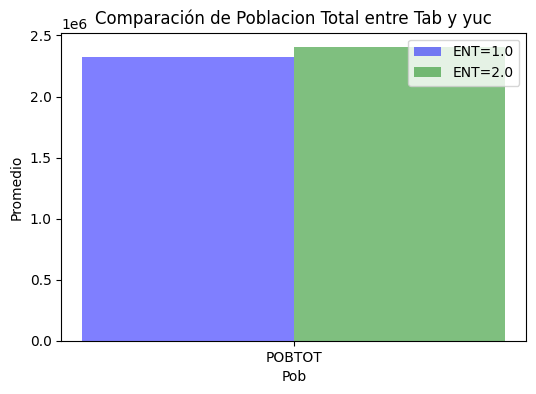

In [150]:
#ENT1=MERIDA
#ENT2=TAB
# Variables de interés
columna = ['POBTOT']

# Calcular los promedios para cada columna y cada observación
promedios_ent_1 = ent_values_1[columna].mean()
promedios_ent_2 = ent_values_2[columna].mean()

color_ent_1 = mcolors.to_rgba('blue', alpha=0.5)
color_ent_2 = mcolors.to_rgba('green', alpha=0.5)

# Crear un gráfico de barras comparando los promedios
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = range(len(columna))

bar1 = ax.bar(index, promedios_ent_1, bar_width, label='ENT=1.0', color=color_ent_1)
bar2 = ax.bar([i + bar_width for i in index], promedios_ent_2, bar_width, label='ENT=2.0', color=color_ent_2)

ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(columna)
ax.set_xlabel('Pob')
ax.set_ylabel('Promedio')
ax.set_title('Comparación de Poblacion Total entre Tab y yuc')
ax.legend()

plt.show()


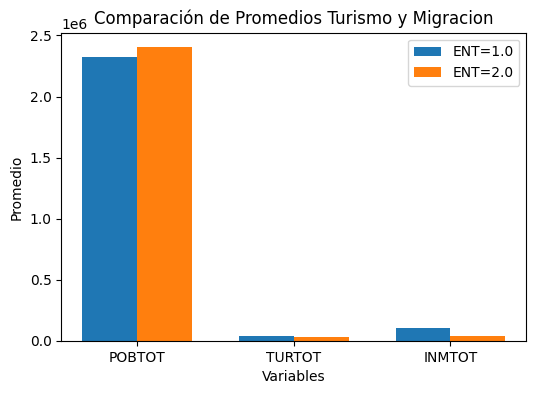

In [110]:
# Variables de interés
columnas2 = ['POBTOT','TURTOT', 'INMTOT']

# Calcular los promedios para cada columna y cada observación
promedios_ent_1 = ent_values_1[columnas2].mean()
promedios_ent_2 = ent_values_2[columnas2].mean()

# Crear un gráfico de barras comparando los promedios
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = range(len(columnas2))

bar1 = ax.bar(index, promedios_ent_1, bar_width, label='ENT=1.0')
bar2 = ax.bar([i + bar_width for i in index], promedios_ent_2, bar_width, label='ENT=2.0')

ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(columnas2)
ax.set_xlabel('Variables')
ax.set_ylabel('Promedio')
ax.set_title('Comparación de Promedios Turismo y Migracion')
ax.legend()

plt.show()

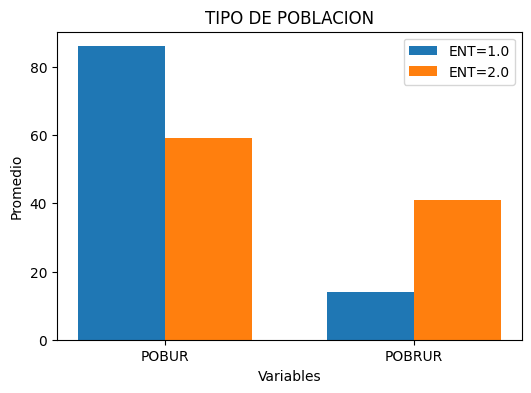

In [111]:
# Variables de interés
columnas3 = ['POBUR', 'POBRUR']

# Calcular los promedios para cada columna y cada observación
promedios_ent_1 = ent_values_1[columnas3].mean()
promedios_ent_2 = ent_values_2[columnas3].mean()

# Crear un gráfico de barras comparando los promedios
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = range(len(columnas3))

bar1 = ax.bar(index, promedios_ent_1, bar_width, label='ENT=1.0')
bar2 = ax.bar([i + bar_width for i in index], promedios_ent_2, bar_width, label='ENT=2.0')

ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(columnas3)
ax.set_xlabel('Variables')
ax.set_ylabel('Promedio')
ax.set_title('TIPO DE POBLACION')
ax.legend()

plt.show()

<ipython-input-117-3eb55b156534>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columnas4)


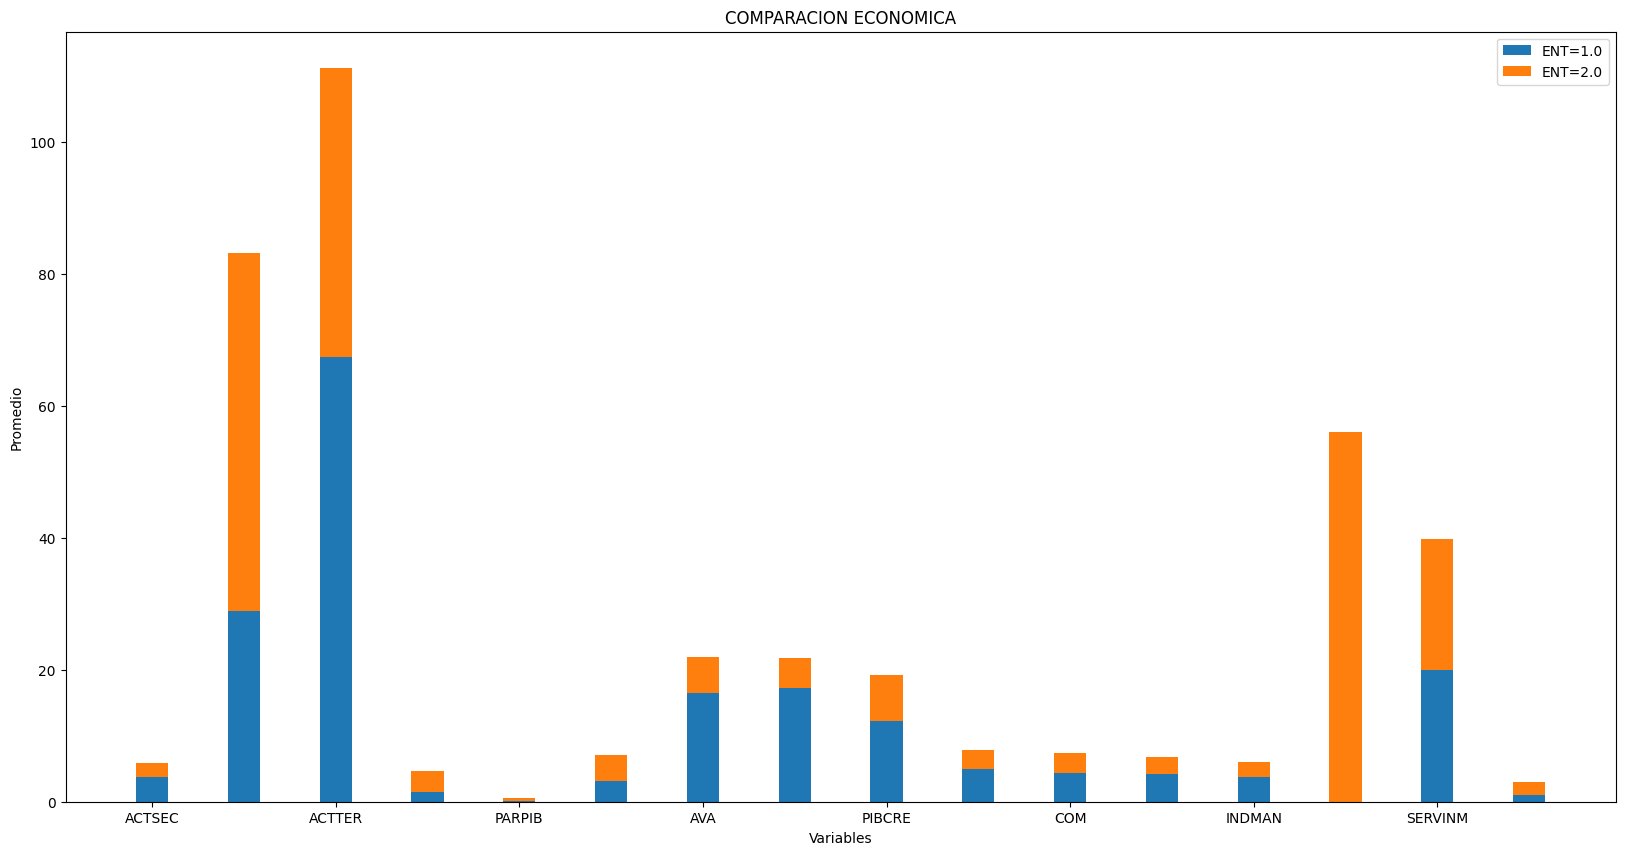

In [117]:
columnas4 = ['ACTPRI', 'ACTSEC', 'ACTTER', 'PARPIB', 'AVA',
       'PIBCRE', 'COM', 'INDMAN', 'SERVINM', 'EDU', 'TRANS', 'ACTGOB',
       'AGROFOR', 'MIN', 'OTROS', 'INGRESO']
valores_ent_1 = ent_values_1[columnas4].iloc[0]
valores_ent_2 = ent_values_2[columnas4].iloc[0]

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(20, 10))

bar_width = 0.35
index = range(len(columnas4))

bar1 = ax.bar(index, valores_ent_1, bar_width, label='ENT=1.0')
bar2 = ax.bar([i for i in index], valores_ent_2, bar_width, label='ENT=2.0', bottom=valores_ent_1)
ax.set_xticklabels(columnas4)
ax.set_xlabel('Variables')
ax.set_ylabel('Promedio')
ax.set_title('COMPARACION ECONOMICA')
ax.legend()

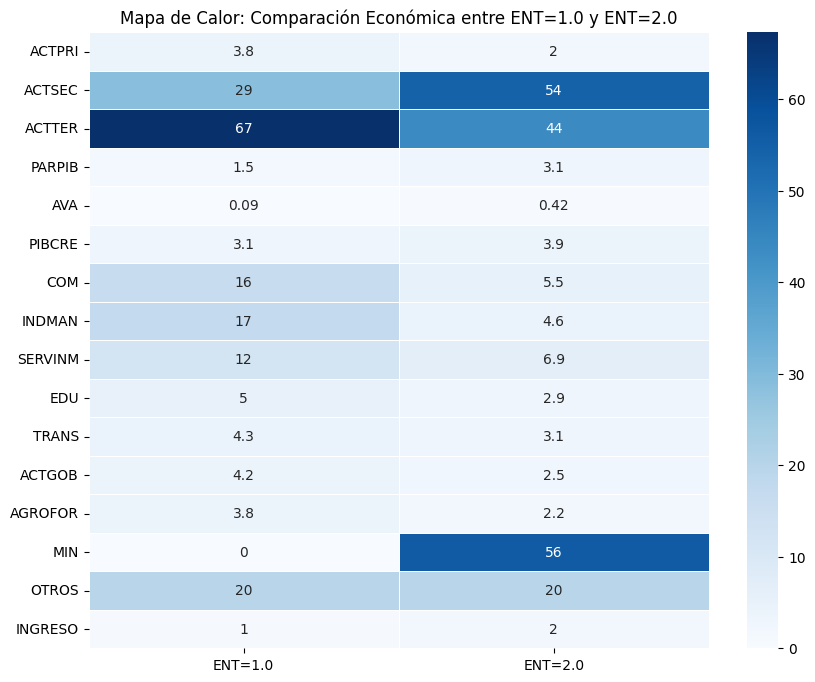

In [156]:
ent_values_1 = datacomb[datacomb['ENT'] == 1.0]
ent_values_2 = datacomb[datacomb['ENT'] == 2.0]

# Variables de interés
columnas5 = ['ACTPRI', 'ACTSEC', 'ACTTER', 'PARPIB', 'AVA', 'PIBCRE', 'COM', 'INDMAN', 'SERVINM', 'EDU', 'TRANS', 'ACTGOB',
             'AGROFOR', 'MIN', 'OTROS', 'INGRESO']

# Obtener los valores directos para cada observación
valores_ent_1 = ent_values_1[columnas5].iloc[0]
valores_ent_2 = ent_values_2[columnas5].iloc[0]

# Crear un DataFrame para los datos
df = pd.DataFrame({'ENT=1.0': valores_ent_1, 'ENT=2.0': valores_ent_2})
df = df.astype(float)
# Crear un mapa de calor con Seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=.5)
ax.set_title('Mapa de Calor: Comparación Económica entre ENT=1.0 y ENT=2.0')
plt.show()


<ipython-input-159-a2b9747b1e26>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = subset_datacomb.corr()


        PORANA  POBRUR  ENT
PORANA     1.0    -1.0 -1.0
POBRUR    -1.0     1.0  1.0
ENT       -1.0     1.0  1.0


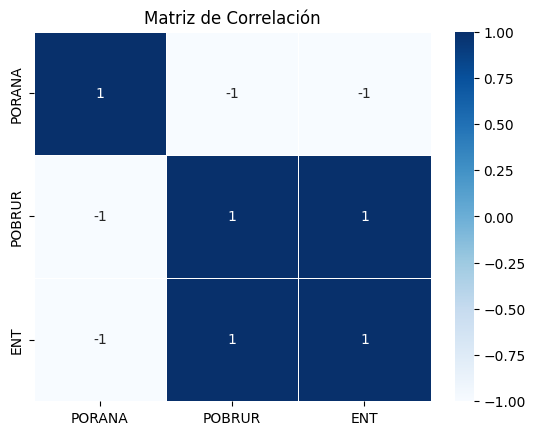

In [159]:
columnas_interes2 = ['PORANA', 'EDU', 'POBRUR','ENT']

# Crear un nuevo DataFrame con las columnas seleccionadas
subset_datacomb = datacomb[columnas_interes2]

# Calcular la matriz de correlación
matriz_correlacion = subset_datacomb.corr()

# Imprimir la matriz de correlación
print(matriz_correlacion)
sns.heatmap(matriz_correlacion, annot=True, cmap='Blues', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

<ipython-input-160-74584b994387>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


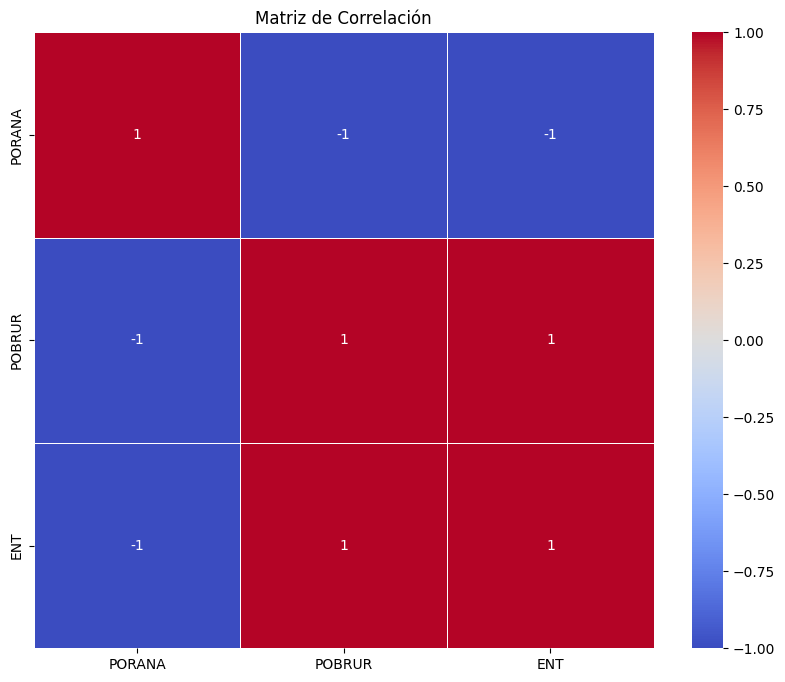

In [160]:
# Seleccionar las columnas de interés
columns_of_interest = ['PORANA', 'EDU', 'POBRUR', 'ENT']

# Crear un nuevo DataFrame con las columnas seleccionadas
selected_data = datacomb[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = selected_data.corr()

# Crear un mapa de calor con Seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
ax.set_title('Matriz de Correlación')
plt.show()


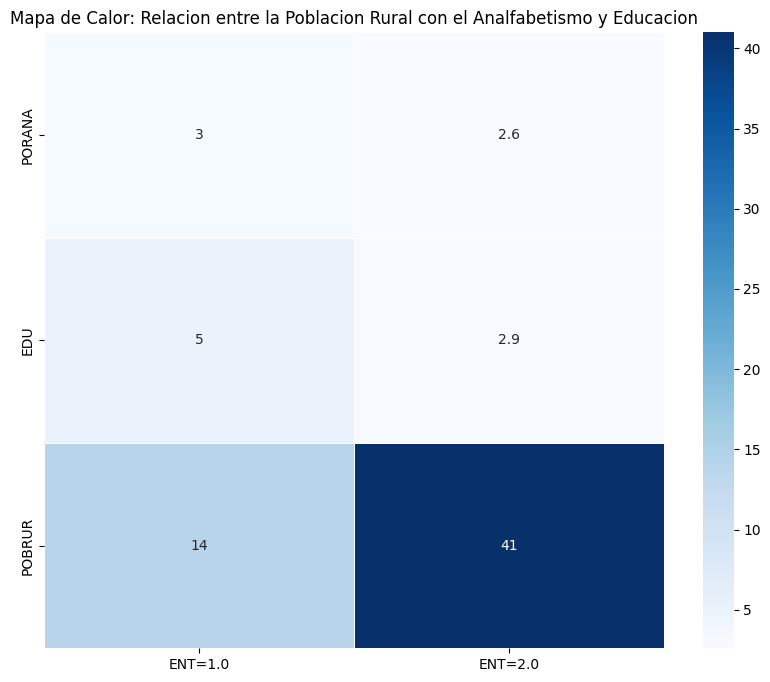

In [157]:
columnas6 = ['PORANA', 'EDU', 'POBRUR']

# Obtener los valores directos para cada observación
valores_ent_1 = ent_values_1[columnas6].iloc[0]
valores_ent_2 = ent_values_2[columnas6].iloc[0]

# Crear un DataFrame para los datos
df = pd.DataFrame({'ENT=1.0': valores_ent_1, 'ENT=2.0': valores_ent_2})
df = df.astype(float)
# Crear un mapa de calor con Seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=.5)
ax.set_title('Mapa de Calor: Relacion entre la Poblacion Rural con el Analfabetismo y Educacion')
plt.show()

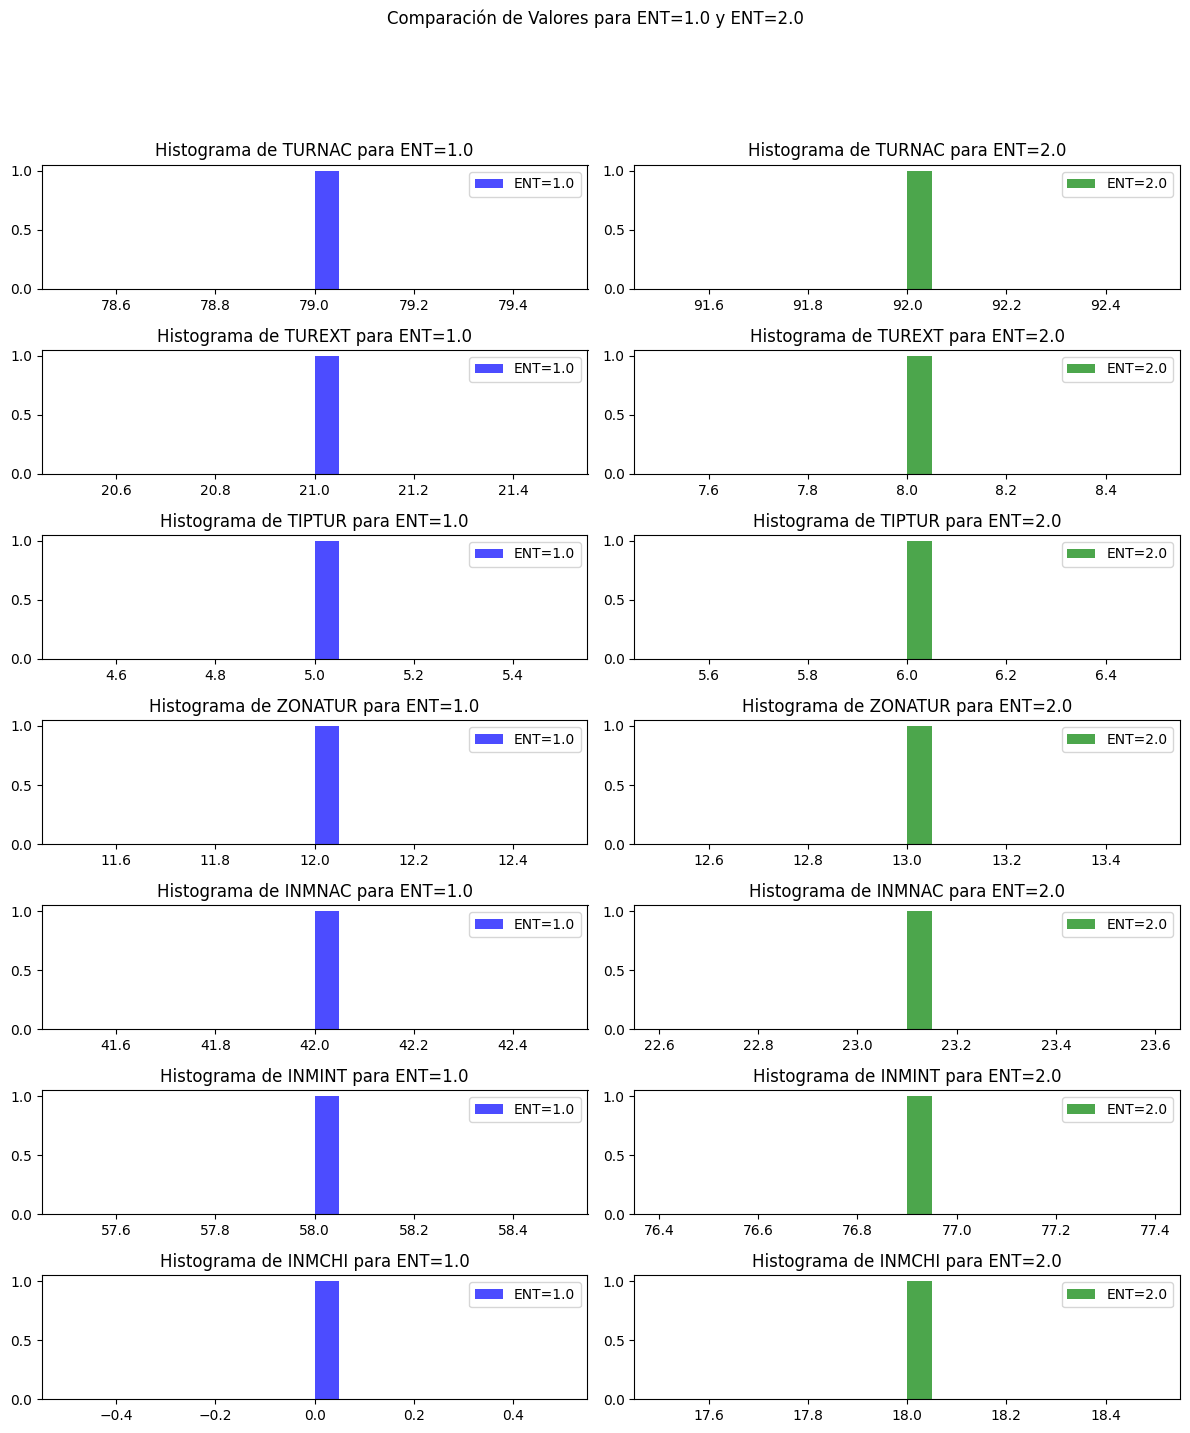

In [165]:

columnasdos = columnasdos[:7]

# Crear una figura y ejes para la tabla de gráficos
fig, axs = plt.subplots(nrows=len(columnasdos), ncols=2, figsize=(12, 2 * len(columnasdos)))
fig.suptitle('Comparación de Valores para ENT=1.0 y ENT=2.0', y=1.02)

# Iterar sobre las columnas y crear gráficos para cada variable
for i, columna in enumerate(columnasdos):
    axs[i, 0].hist(ent_values_1[columna], bins=20, color='blue', alpha=0.7, label='ENT=1.0')
    axs[i, 0].set_title(f'Histograma de {columna} para ENT=1.0')
    axs[i, 0].legend()

    axs[i, 1].hist(ent_values_2[columna], bins=20, color='green', alpha=0.7, label='ENT=2.0')
    axs[i, 1].set_title(f'Histograma de {columna} para ENT=2.0')
    axs[i, 1].legend()

# Ajustar el diseño de la figura
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# INTERPRETACION DE RESULTADOS

Interpretando la información mapas de calor, las correlaciones y las graficas, llegue a la conclusion que la división socioecnomica se puede deber a dos factores, el tipo de migracionq eu recibe el estado con el rubro de su actividad ecnomica más fuerte, que en este caso es el comercio, en este caso el tipo de inmigracion extrangera es con ese lucro; con el contrastre de Tabasco que su migración extrangera es con fines de prteccion de diversos temas (por ejemplo Venezuela) y para trabajo industrial. Enton teniendo en cuenta estos patrones, le di un enfoque a la educacio, ya que hay una estrecha correlacion con el peso que tiene el rubro de carreras con su actividad economica más fuerte:

En Tabasco la actividad economica con más peso es la Mineria de Petroleo, la construccion y la manofactura, por lo tanto las carrreras con más peso en patrones son las ingenierias petroquimicas y de construcciom, seguidas de veterinaria y agropecuaria.

En Merida, la actividad economica más fuerte es el comercio, seguido de la manofuactura y servicios medicos, por lo tanto hay un patron de carreras con fines de ciencia y tecnologia y de medicina.
